<a href="https://colab.research.google.com/github/fonsecajr/Projects/blob/master/Mandelbrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

“A Mandelbrot set marks the set of points in the complex plane such that the corresponding Julia set is connected and not computable. The Mandelbrot set is the set obtained from the recurrence relation, Z_(n) = Z²_(n-1) + c, where, Z_(0) = c. where c is a complex number” — Wolfram Mathworld.

The colors in a Mandelbrot set represents the iterations at which that complex number diverges to infinity (we can use here some threshold instead of infinity). Generally, the black color is for numbers that converge to zero (here we can use some maximum iteration limit under which if the number is not greater than the threshold value we assume it is converging to zero) and that's all in a Mandelbrot set (not really).

In [0]:
# Import libraries for simulation
import tensorflow as tf
assert tf.__version__.startswith('2')
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

In [0]:
# Define a function to actually display the image once you have iteration counts.
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

In [0]:
# Use of NumPy to create a 2D array of complex numbers
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

# Define and initialize TensorFlow tensors.
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
not_diverged =tf.Variable(tf.zeros_like(xs, tf.bool))
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [0]:
# Specify the computation and run it for a couple hundred steps
for i in range(100): 
  # Compute the new values of z: z^2 + x
  zs = zs*zs+xs
  # Have we diverged with this new value?
  not_diverged = tf.abs(zs) < 4
  # Operation to update the iteration count.
  #
  # Note: We keep computing zs after they diverge! This
  #       is very wasteful! There are better, if a little
  #       less simple, ways to do this.
  #
  ns = ns + tf.cast( not_diverged, tf.float32)

In [0]:
# Convert from tensor to numpy array for visualization
ns = ns.numpy()

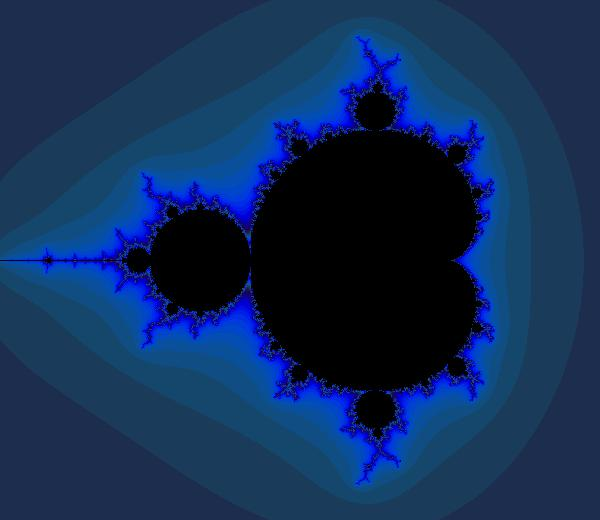

In [43]:
# Let's see what you've got.
DisplayFractal(ns)